In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de los datos

In [24]:
loan_data = pd.read_csv('loan.csv')

/home/usuario/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Análisis Exploratorio

In [25]:
loan_data.shape

(887379, 74)

In [6]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

Por defecto, `IPython` limita el número de filas y columnas que muestra en pantalla, pero esta configuración se puede modificar temporalmente.

*para contraer la consola: cell>current output>toggle

In [26]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loan_data.iloc[0])

id                                                                       1077501
member_id                                                                1296599
loan_amnt                                                                   5000
funded_amnt                                                                 5000
funded_amnt_inv                                                             4975
term                                                                   36 months
int_rate                                                                   10.65
installment                                                               162.87
grade                                                                          B
sub_grade                                                                     B2
emp_title                                                                    NaN
emp_length                                                             10+ years
home_ownership              

Las columnas que no tienen un tipo numérico, deberán ser preprocesadas o eliminadas antes de pasárselas a un clasificador de `scikit-learn`.

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loan_data.dtypes)

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

Vemos que hay algunas columnas para las que la mayoría de valores son NA.

In [9]:
loan_data.isnull().mean().sort_values(ascending=False)

dti_joint                      0.999426
verification_status_joint      0.999424
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
all_util                       0.975916
max_bal_bc                     0.975916
open_rv_24m                    0.975916
open_rv_12m                    0.975916
total_cu_tl                    0.975916
total_bal_il                   0.975916
open_il_24m                    0.975916
open_il_12m                    0.975916
open_il_6m                     0.975916
open_acc_6m                    0.975916
inq_fi                         0.975916
inq_last_12m                   0.975916
desc                           0.857977
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
mths_since_last_delinq         0.511971
next_pymnt_d                   0.285077
total_rev_hi_lim               0.079195
tot_cur_bal                    0.079195
tot_coll_amt                   0.079195


`Seaborn` es una biblioteca de visualización basada en `Matplotlib` y que añade nuevas funcionalidades a esta.
<a href='https://seaborn.pydata.org/generated/seaborn.FacetGrid.html'>FacetGrid</a> es una clase de `Seaborn` para visualizar un `Dataframe` representando la misma variable en función de múltiples facetas/dimensiones.

En este caso representamos el número de créditos de cada cuantía en función de la calificación del prestatario.

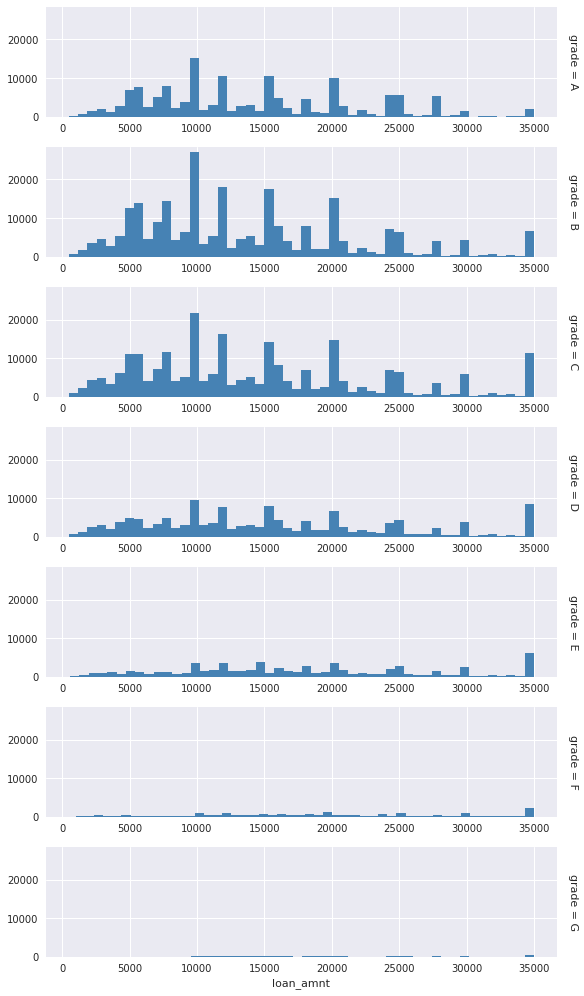

In [27]:
sns.set(style="darkgrid")
g = sns.FacetGrid(loan_data, row="grade", margin_titles=True, size=2, aspect=4, row_order=np.unique(loan_data.grade))
g.map(plt.hist, "loan_amnt", color="steelblue", bins=50, lw=0)

Y a continuación la frecuencia de distintos tipos de interés en función de la calificación.

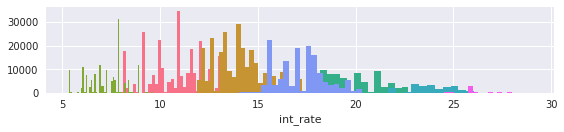

In [18]:
sns.set(style="darkgrid")
g = sns.FacetGrid(loan_data, hue="grade", margin_titles=True, size=2, aspect=4, row_order=np.unique(loan_data.grade))
g.map(plt.hist, "int_rate", bins=50, lw=0)

La conclusión podría ser que los clientes con una calificación mejor obtienen más créditos (con una distribución de cantidades prestadas similar) y a un tipo más bajo.

### Ejercicio
Añadir alguna dimensión adicional en forma de filas y color en uno de los gráficos anteriores.

In [31]:
ld2=loan_data
ld2['amount_interval']=pd.cut(ld2,'loan_amnt',3,labels=['Small','Medium','Large'])
sns.set(style="darkgrid")
g = sns.FacetGrid(loan_data, row="grade",col="amount_interval", margin_titles=True, size=2, aspect=4, row_order=np.unique(loan_data.grade))
g.map(plt.hist, "int_rate", bins=50, lw=0)

IndexError: list assignment index out of range

A continuación representamos el volumen total de créditos en función del tiempo:

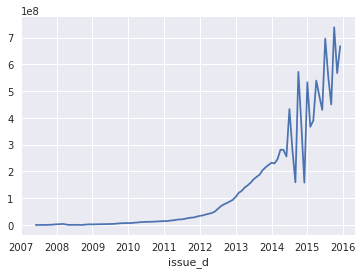

In [29]:
loan_data.loan_amnt.groupby(pd.to_datetime(loan_data.issue_d)).sum().sort_index().plot()

### Ejercicio:
Representa en un diagrama de baja y bigotes la distribución de cantidades correspondientes a los prestamos

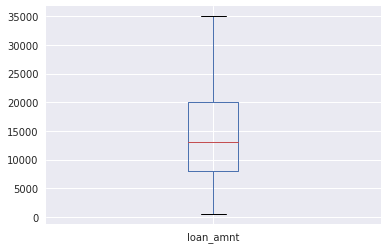

In [30]:
loan_data.loan_amnt.plot(kind='box')

# Definición del problema de negocio

Si tomamos los datos de Lending Club y se los  pasamos a un clasificador como Random Forests o a una red neuronal, obtendremos unos resultados muy buenos sobre el conjunto de test, pero tenemos que plantearnos cuál sería el sentido del problema que estamos resolviendo en un escenario de negocio real.
Los dos escenarios más claros que pueden planterse como clasificación son:
* Escenario 1: Un inversor tiene acceso a los datos y quiere predecir el riesgo de impago antes de prestar su dinero. En este caso toda la información que se genera a partir del momento en que se concede el crédito no estaría todavía disponible.
* Escenario 2: Se desea predecir el riesgo de impago en créditos ya concedidos y que actualmente están al día, para tratar de tomar medidas que lo eviten o de minimizar daños.

Nos decantamos por el Escenario 1, por su simplicidad.

## Definimos la variable target

In [32]:
loan_data.loan_status = loan_data.loan_status.isin(
            ["Charged Off",
            "Default",
            "Does not meet the credit policy. Status:Charged Off",
            "In Grace Period", 
            "Default Receiver", 
            "Late (16-30 days)",
            "Late (31-120 days)"]).astype(int)

## Análisis incluyendo la nueva variable

In [33]:
loan_data.loan_status.value_counts()

0    819950
1     67429
Name: loan_status, dtype: int64

In [ ]:
loan_data.corr()['loan_status'].sort_values(ascending=False)

Representamos el porcentaje de créditos problemáticos en función de la calificación

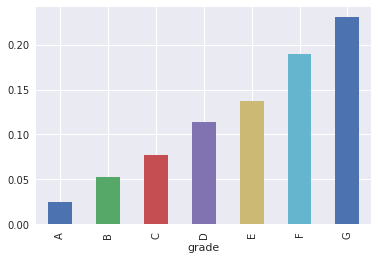

In [34]:
loan_data.groupby('grade').loan_status.mean().plot(kind='bar')

# Preparación de datos para la tarea de clasificación

In [35]:
Y = loan_data.loan_status

In [36]:
# Quitamos la variable target
X = loan_data.drop(['loan_status'], axis=1)


#Columnas con informacion de seguimiento de creditos ya concedidos 
X = X.drop(['recoveries', 'collection_recovery_fee', 'out_prncp','out_prncp_inv',
            'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
            'last_pymnt_d','last_pymnt_amnt','next_pymnt_d','total_rec_late_fee',
            'funded_amnt','funded_amnt_inv'], axis=1)

#Columnas que no aportan informacion
X = X.drop(['id', 'member_id', 'emp_title', 'url', 'title'], axis=1)
X = X.drop(['grade'], axis=1)           # grade es redundante con sub_grade
X = X.drop(['pymnt_plan'], axis=1)    # tiene solo 10 filas con valor 'y' y 887372 con valor 'n'
X = X.drop(['zip_code'], axis=1)
# zip_code es redundante con addr_state 
# y nos llevaría a añadir demasiadas dimensiones al procesarla con OneHotEncoder

### Ejercicio
Quitar todas las columnas con más de un 60% de NAs (y trabajar con el nuevo DataFrame a partir de ahora)

In [37]:
X = X.loc[:,X.isnull().sum()/X.isnull().count()< 0.6] #te quedas con todas las filas y se utiliza un filtro para las columnas

In [38]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

Las columnas con información temporal, están guardadas como strings. Las convertimos primero a fecha (esto sería suficiente y lo más correcto desde el punto de vista de Pandas) y luego a valores enteros (porque si no scikit-learn nos dará problemas).

In [39]:
X.issue_d = pd.to_datetime(X.issue_d).values.astype('int')
X.earliest_cr_line = pd.to_datetime(X.earliest_cr_line).values.astype('int')
X.last_credit_pull_d = pd.to_datetime(X.last_credit_pull_d).values.astype('int')

Codificamos las variables categóricas como enteros

In [40]:
from sklearn.preprocessing import LabelEncoder

#Ordinal: orden de valores coincide con el orden alfanumerico; no hay NAs - sustituye valores por enteros(labelencoder)
sub_grade = LabelEncoder()
sub_grade.fit(np.unique(X.sub_grade))
X.sub_grade = sub_grade.transform(X.sub_grade)

#Ordinal: orden de valores no coincide con el orden alfanumerico; hay NAs - sustitución a mano
emp_length_mapping = {
"< 1 year": 0.0,
"1 year": 1.0,
"2 years": 2.0,
"3 years": 3.0,
"4 years": 4.0,
"5 years": 5.0,
"6 years": 6.0,
"7 years": 7.0,
"8 years": 8.0,
"9 year": 9.0,
"10+ years": 10.0,
"n/a": np.nan
}
X.emp_length = X.emp_length.map(emp_length_mapping)

#Categorica, no hay NAs
home_ownership = LabelEncoder()
home_ownership.fit(np.unique(X.home_ownership))
X.home_ownership = home_ownership.transform(X.home_ownership)

#Categorica, no hay NAs
verification_status = LabelEncoder()
verification_status.fit(np.unique(X.verification_status))
X.verification_status = verification_status.transform(X.verification_status)

#Categorica, no hay NAs
purpose = LabelEncoder()
purpose.fit(np.unique(X.purpose))
X.purpose = purpose.transform(X.purpose)

#Categorica, no hay NAs
addr_state = LabelEncoder()
addr_state.fit(np.unique(X.addr_state))
X.addr_state = addr_state.transform(X.addr_state)

#Ordinal: orden de valores coincide con el orden alfanumerico; no hay NAs
term = LabelEncoder()
term.fit(np.unique(X.term))
X.term = term.transform(X.term)

#Binaria, no hay NAs - se le asigna aleatoriamente 0-1 
initial_list_status = LabelEncoder()
initial_list_status.fit(np.unique(X.initial_list_status))
X.initial_list_status = initial_list_status.transform(X.initial_list_status)

#Binaria, no hay NAs - se le asigna aleatoriamente 0-1 
application_type = LabelEncoder()
application_type.fit(np.unique(X.application_type))
X.application_type = application_type.transform(X.application_type)

## Dividimos en conjuntos de Entrenamiento, validación y test

In [41]:
from sklearn.model_selection import train_test_split
# X_train_dev & Y_train_dev en estas variables están los de entrenamiento y validación
X_train_dev,X_test,Y_train_dev,Y_test = train_test_split(X, Y, test_size=0.15) #aquí sacamos el 15% de test
X_train,X_dev,Y_train,Y_dev = train_test_split(X_train_dev, Y_train_dev, test_size=0.15) #del 85% sacamos el 15% para validación (_dev)

## Fuciones auxiliares que nos facilitarán la vida

In [43]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def plot_roc(Y, Y_scores):
    fpr, tpr, thresholds = roc_curve(Y, Y_scores, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('Tasa falsos positivos')
    plt.ylabel('Tasa verdaderos positivos')
    plt.title('Curva ROC')
    plt.plot(fpr, tpr)
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    
def eval_model(pipe, X_train, Y_train, X_test, Y_test):
    pipe.fit(X_train, Y_train)
    predicted_test = pipe.predict(X_test)
    scores_test = pipe.predict_proba(X_test)[:,1] #necesitamos la probabilidad para dibujar el area bajo la curva
    predicted_train = pipe.predict(X_train)
    scores_train = pipe.predict_proba(X_train)[:,1]
    print()
    print("Evaluación en el conjunto de entrenamiento:")
    print(classification_report(Y_train, predicted_train))
    print('Roc_auc_score:', roc_auc_score(Y_train, scores_train))
    print()
    print("Evaluación en el conjunto de validación:")
    print(classification_report(Y_test, predicted_test))
    print('Roc_auc_score:', roc_auc_score(Y_test, scores_test))
    plot_roc(Y_test, scores_test)

## Naive Bayes

*Evaluación del conjunto

precision= tp/ (tp+fp)
recall= tp/ (tp+tn)
media armónica:
f1= media armónica entre precisión y recall

*Area bajo la curva = Roc_auc_score
(tener en cuenta que para un clasificador tonto =0.5 por lo tanto hay que mejorar este valor)


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.96      0.07      0.12    592453
          1       0.08      0.96      0.14     48678

avg / total       0.89      0.13      0.13    641131

Roc_auc_score: 0.663476435717

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.07      0.12    104602
          1       0.08      0.96      0.14      8539

avg / total       0.89      0.13      0.13    113141

Roc_auc_score: 0.663098524891


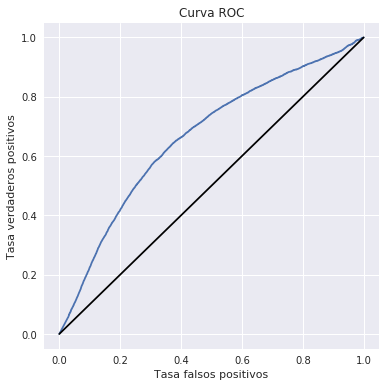

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_features = ['home_ownership', 'verification_status', 'purpose', 'addr_state']

pipe = Pipeline([
    ('imp',Imputer()),   #sustituir variables por la media
    ('ohe',OneHotEncoder(sparse=False, categorical_features=np.in1d(X.columns.get_values(),categorical_features))),
    ('std',StandardScaler()),   #media 0 y desviación estándar 1
    ('clf',GaussianNB())
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## Random Forest


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    592453
          1       1.00      0.99      1.00     48678

avg / total       1.00      1.00      1.00    641131

Roc_auc_score: 0.999999999584

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96    104602
          1       0.58      0.02      0.05      8539

avg / total       0.90      0.93      0.89    113141

Roc_auc_score: 0.770980131988


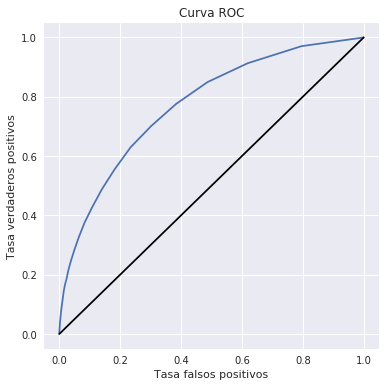

In [45]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('imp',Imputer()),
    ('ohe',OneHotEncoder(sparse=False, categorical_features=np.in1d(X.columns.get_values(),categorical_features))),
    ('std',StandardScaler()),
    ('for',RandomForestClassifier(n_estimators=50))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

### Ejercicio
Utiliza `GridSearchCV` para seleccionar el mejor valor para el hiperparámetro "max_depth" de `RandomForest`

In [ ]:
from sklearn.metrics import fl_score
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('imp',Imputer()),
    ('ohe',OneHotEncoder(sparse=False, categorical_features=np.in1d(X.columns.get_values(),categorical_features))),
    ('std',StandardScaler()),
    ('for',RandomForestClassifier(n_estimators=50))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)



# Problema de clasificación desequilibrada (Imbalanced Classification)

* Métricas de evaluación: el porcentaje de aciertos ("accuracy") no tendrá sentido. Es preferible utilizar la métrica f1 de la clase minoritaria o el área bajo la curva ROC.
* Técnicas de sobremuestreo del la clase minoritaria o submuestreo de la mayoritaria. Es muy importante tener en cuenta que en los conjuntos de validación y test debe mantenerse la distribución inicial.
* SMOTE: sobremuestreo de la clase minoritaria mediante la creación de instancias sintéticas similares a las ya disponibles.
* Los algoritmos de tipo ensemble (combinan varios clasificadores menos potentes para mejorar sus resultados) suelen funcionar bien con problemas desequilibrados, Random Forest y Boosting pertenecen a esta familia.

Evaluation on trainig set
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    592379
          1       1.00      1.00      1.00    592379

avg / total       1.00      1.00      1.00   1184758

roc_auc_score 0.999999999667
Evaluation on validation set
             precision    recall  f1-score   support

          0       0.93      0.97      0.95    123046
          1       0.33      0.17      0.22     10061

avg / total       0.89      0.91      0.90    133107

roc_auc_score 0.769657179449


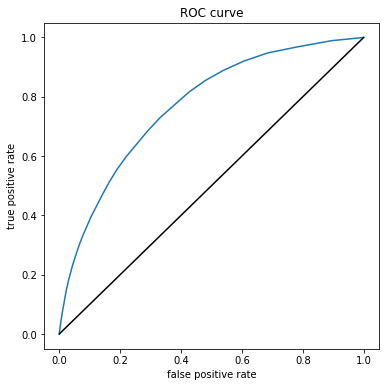

In [18]:
from imblearn.over_sampling import SMOTE

imputer = Imputer()
onehot_encoder = OneHotEncoder(sparse=False, categorical_features=np.in1d(X.columns.get_values(),categorical_features))
std_scaler = StandardScaler()

clf = RandomForestClassifier(n_estimators=50)

X_train2 = imputer.fit_transform(X_train)
X_train2 = onehot_encoder.fit_transform(X_train2)
X_train2 = std_scaler.fit_transform(X_train2)
X_train2, Y_train2 = SMOTE().fit_sample(X_train2, Y_train)
clf.fit(X_train2, Y_train2)

Y_train_predicted = clf.predict(X_train2)
Y_train_scores = clf.predict_proba(X_train2)[:,1]
print("Evaluation on trainig set")
print(classification_report(Y_train2, Y_train_predicted))
print('roc_auc_score', roc_auc_score(Y_train2, Y_train_scores))

X_test2 = imputer.transform(X_test)
X_test2 = onehot_encoder.transform(X_test2)
X_test2 = std_scaler.transform(X_test2)
Y_test_predicted = clf.predict(X_test2)
Y_test_scores = clf.predict_proba(X_test2)[:,1]
print("Evaluation on validation set")
print(classification_report(Y_test, Y_test_predicted))
print('roc_auc_score', roc_auc_score(Y_test, Y_test_scores))

fpr, tpr, thresholds = roc_curve(Y_test, Y_test_scores, drop_intermediate = False, pos_label = 1)
plt.figure(1, figsize=(6,6))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.legend(loc=2, prop={'size':11})
plt.plot([0,1],[0,1], color = 'black')


## Selección de rasgos

NOS QUEDAMOS CON LAS MEJORES COLUMNAS


/home/usuario/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [25] are constant.
  UserWarning)
/home/usuario/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw



Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    592453
          1       1.00      0.98      0.99     48678

avg / total       1.00      1.00      1.00    641131

Roc_auc_score: 0.999993377053

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.93      0.99      0.96    104602
          1       0.16      0.03      0.05      8539

avg / total       0.87      0.92      0.89    113141

Roc_auc_score: 0.703545954869


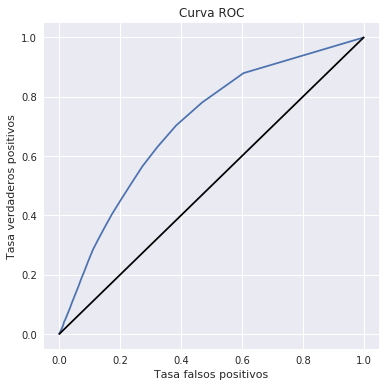

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

pipe = Pipeline([
    ('imp', Imputer()),
    ('std', StandardScaler()),
    ('select_feat', SelectKBest(f_classif, k=10)),
    ('class', RandomForestClassifier(n_estimators=50))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)